**Data Preparation : Kwang**

In [1]:
import gdown

# Replace 'your_google_drive_link' with the actual link of the file you want to download
#300*300    1Wl-6RT-k-XaLaznkKeHYhqGPOdPhSZTW
#600*600    1WsmMYCz5poZYgdhEpwlW3n1KLyYjbShw
#300*300 color    1WzaZ88vYQ50Io9-2GTVXOzFMRD5zOmGj
google_drive_link = f'https://drive.google.com/uc?id=1SLPVVz00YZNEa3Som7ww9lpEZ23xup2A'

# Specify the output file name
output_file = 'images_dataset.zip'

# Download the file
gdown.download(google_drive_link, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1SLPVVz00YZNEa3Som7ww9lpEZ23xup2A
To: /content/images_dataset.zip
100%|██████████| 4.07M/4.07M [00:00<00:00, 96.2MB/s]


'images_dataset.zip'

In [2]:
#Unzip file
import zipfile

def unzip_file(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

zip_file_path = '/content/images_dataset.zip'
extracted_folder_path = '/content/extracted_images'

unzip_file(zip_file_path, extracted_folder_path)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from tensorflow.keras.models import Model # basic class for specifying and training a neural network
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 #pip3 install opencv-python
import urllib
import urllib
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from google.colab.patches import cv2_imshow

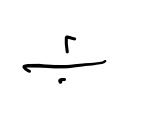

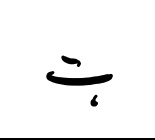

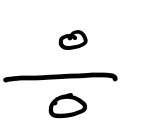

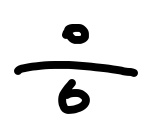

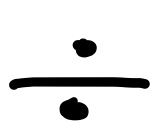

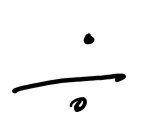

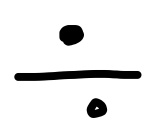

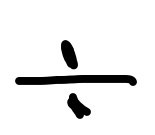

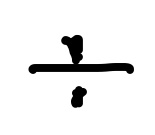

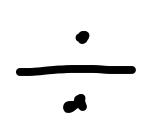

In [4]:
for image_number in range(1, 11):
  image = cv2.imread(f"/content/extracted_images/symbol/image_{image_number}.jpg")
  cv2_imshow(image)

In [5]:
import cv2

for image_number in range(1100):
    image = cv2.imread(f"/content/extracted_images/symbol/image_{image_number}.jpg")
    desired_width = 150 # Desired width
    desired_height = 130  # Desired height

    resized_img = cv2.resize(image, (desired_width, desired_height))
    cv2.imwrite(f"/content/extracted_images/symbol/image_{image_number}.jpg", resized_img)

cv2.imread(f"/content/extracted_images/symbol/image_1.jpg").shape

(130, 150, 3)

In [6]:
data = pd.read_csv("/content/extracted_images/symbol/labeled_music_notes.csv")
print(data)

      Unnamed: 0      image_name  target
0              0     image_0.jpg       0
1              1     image_1.jpg       0
2              2    image_10.jpg       0
3              3    image_11.jpg       0
4              4    image_12.jpg       0
...          ...             ...     ...
1095        1095  image_1095.jpg      10
1096        1096  image_1096.jpg      10
1097        1097  image_1097.jpg      10
1098        1098  image_1098.jpg      10
1099        1099  image_1099.jpg      10

[1100 rows x 3 columns]


In [7]:
#convert images to matrix
from PIL import Image

def image_to_matrix(image_name):
  all_matrices = []

  for file_name in image_name.to_list():
      # Create the full path to the image file
      image_path = f'/content/extracted_images/symbol/{file_name}'

      # Open the grayscale image
      image = Image.open(image_path)

      # Convert the image to a NumPy array
      image_matrix = np.array(image)

      # Append the matrix to the list
      all_matrices.append(image_matrix)

  # Convert the list of matrices to a NumPy array
  diabetic_retinopathy_data = np.array(all_matrices)
  return diabetic_retinopathy_data


**Train model : Mild, Nina**

In [8]:
class_names = ['div', 'equal', 'Intigrate', 'Lambda', 'minus', 'Mu', 'plus', 'Root', 'Sigma big', 'Sigma small', 'time']
num_classes = len(class_names)


batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 32 # (we iterate 200 times over the entire training set) change to 10

In [9]:
#split data

random_seed = 42

from sklearn.model_selection import train_test_split

X = data['image_name']
Y = data['target']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, Y, test_size=0.3, random_state=random_seed)

X_train = image_to_matrix(X_train_raw)
print(X_train.shape)
X_test = image_to_matrix(X_test_raw)
y_train = y_train_raw.to_numpy()
y_test = y_test_raw.to_numpy()
print(y_train[0])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

Y_train = tf.keras.utils.to_categorical(y_train, 11) # One-hot encode the labels
Y_test = tf.keras.utils.to_categorical(y_test, 11) # One-hot encode the labels
class_names[np.argmax (Y_train[0])]

(770, 130, 150, 3)
2


'Intigrate'

In [10]:
from keras.applications import VGG19
vgg = VGG19(include_top= False, weights = "imagenet", input_shape=(130,150,3))
vgg_layer_list = vgg.layers


model = Sequential ()

for layer in vgg_layer_list:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False


model.add(Flatten())

# Fully connected layer. 1 hidden layer consisting of 512 nodes
model.add(Dense(256, name='Dense1'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(256, name='Dense2'))
model.add(Activation('sigmoid'))
model.add(Dense(256, name='Dense3'))
model.add(Activation('sigmoid'))
model.add(Dense(num_classes, activation='softmax', name='Dense4'))
print(model.summary())

model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer=keras.optimizers.Adam(learning_rate=0.001), # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 130, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 130, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 65, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 65, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 65, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 37, 128)       0         
                                                         

In [11]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation

Epoch 1/32
22/22 [==============================] - 17s 285ms/step - loss: 2.2643 - accuracy: 0.1934 - val_loss: 1.9261 - val_accuracy: 0.3896
Epoch 2/32
22/22 [==============================] - 2s 73ms/step - loss: 1.6615 - accuracy: 0.5123 - val_loss: 1.4727 - val_accuracy: 0.5325
Epoch 3/32
22/22 [==============================] - 2s 80ms/step - loss: 1.1658 - accuracy: 0.7532 - val_loss: 1.0275 - val_accuracy: 0.7792
Epoch 4/32
22/22 [==============================] - 2s 81ms/step - loss: 0.7899 - accuracy: 0.8817 - val_loss: 0.7151 - val_accuracy: 0.8182
Epoch 5/32
22/22 [==============================] - 2s 75ms/step - loss: 0.5068 - accuracy: 0.9250 - val_loss: 0.5207 - val_accuracy: 0.8312
Epoch 6/32
22/22 [==============================] - 2s 74ms/step - loss: 0.3172 - accuracy: 0.9625 - val_loss: 0.3987 - val_accuracy: 0.8442
Epoch 7/32
22/22 [==============================] - 2s 81ms/step - loss: 0.2203 - accuracy: 0.9683 - val_loss: 0.3712 - val_accuracy: 0.8831
Epoch 8/32


In [12]:
score = model.evaluate(X_test, Y_test, verbose=1)  # Evaluate the trained model on the test set!
print(Y_test.shape)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

11/11 [==============================] - 2s 218ms/step - loss: 0.3753 - accuracy: 0.9000
(330, 11)
Test loss: 0.3752797544002533
Test accuracy: 89.99999761581421


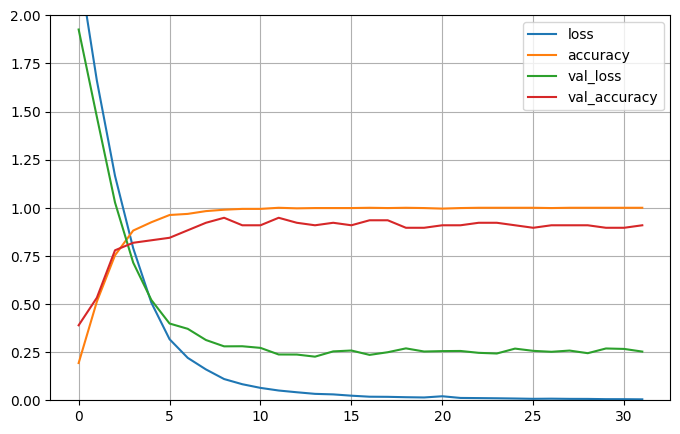

In [13]:
err_hist = history.history
pd.DataFrame(err_hist).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

11/11 [==============================] - 1s 61ms/step
[[30  1  0  0  1  0  0  1  0  0  0]
 [ 0 25  0  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  2  0  2  0]
 [ 0  0  0 29  0  1  0  4  1  0  0]
 [ 0  0  1  0 27  0  0  0  0  0  0]
 [ 0  0  0  1  0 28  0  1  5  0  2]
 [ 0  0  0  0  0  0 28  0  0  0  0]
 [ 0  0  1  3  0  1  0 29  0  0  0]
 [ 0  0  0  2  0  1  0  1 24  1  0]
 [ 0  0  0  0  0  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0  0  0  0 23]]
              precision    recall  f1-score   support

         div       1.00      0.91      0.95        33
       equal       0.96      1.00      0.98        25
   Intigrate       0.93      0.87      0.90        31
      Lambda       0.83      0.83      0.83        35
       minus       0.96      0.96      0.96        28
          Mu       0.90      0.76      0.82        37
        plus       1.00      1.00      1.00        28
        Root       0.76      0.85      0.81        34
   Sigma big       0.80      0.83      0.81        29
 Sigma s

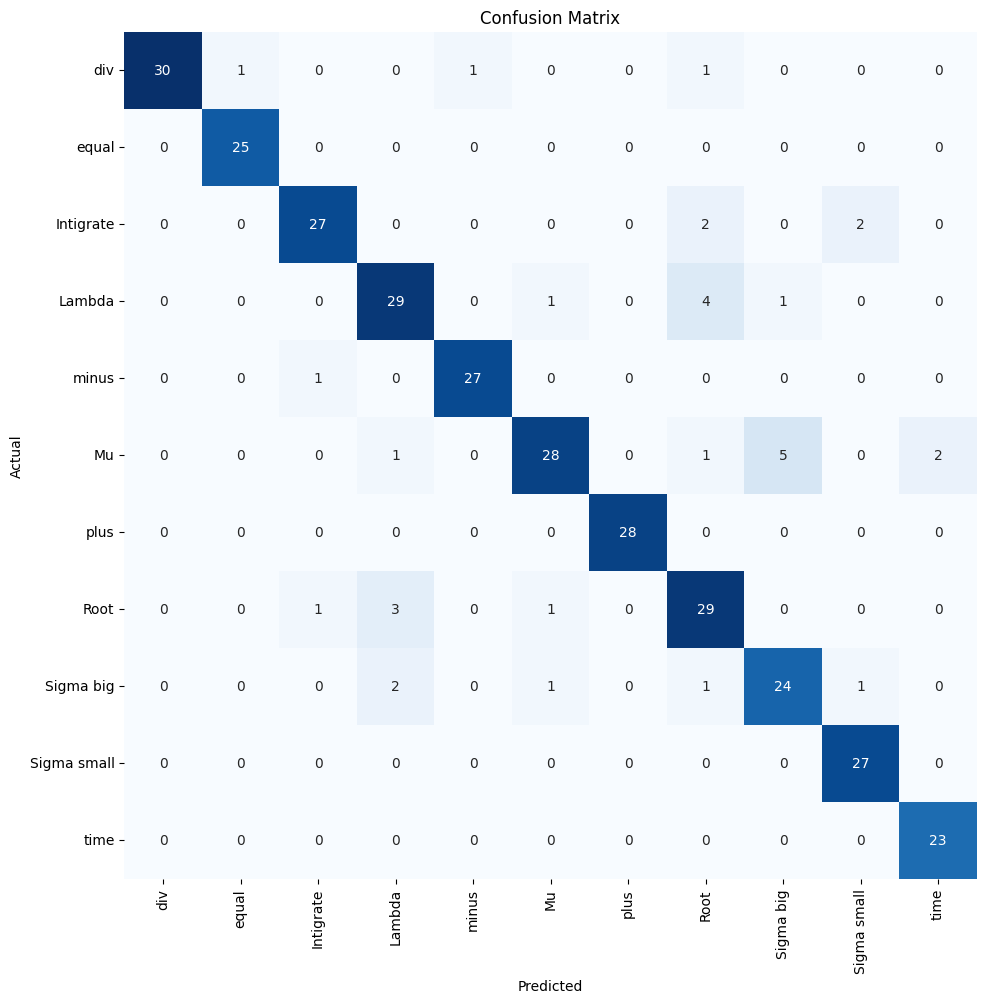

In [14]:
predictions = model.predict(X_test)

cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes))
print(cm)
clr = classification_report(np.argmax(Y_test, axis=1), np.argmax(predictions,axis=1), labels=np.arange(num_classes), target_names=class_names)
print(clr)
plt.figure(figsize=(11, 11))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(11) + 0.5, labels=class_names, rotation=90)
plt.yticks(ticks=np.arange(11) + 0.5, labels=class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('Confusion Matrix55.png')
plt.show()


In [15]:
predictions = model.predict(X_test[0:1024])

11/11 [==============================] - 1s 61ms/step



testing data index: 0  predict:  3  actual:  0
[1.2529956e-04 2.5762818e-04 1.3142217e-04 9.9810398e-01 1.0191102e-05
 1.0836568e-04 3.9088566e-04 3.1705401e-04 3.0670260e-04 7.4151167e-06
 2.4110400e-04]


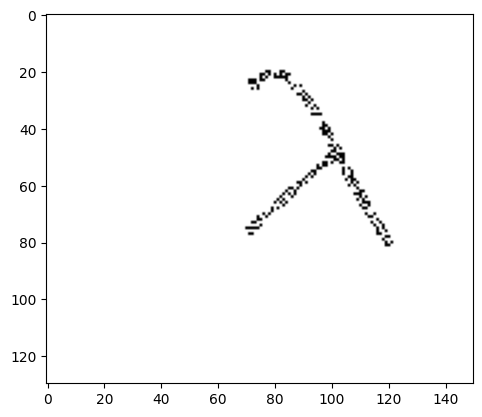


testing data index: 1  predict:  6  actual:  0
[2.6229041e-04 3.2468160e-05 1.9444592e-04 3.5259390e-04 6.9972436e-04
 1.9250302e-04 9.9755609e-01 1.9990295e-05 1.6436436e-05 1.0714209e-05
 6.6269416e-04]


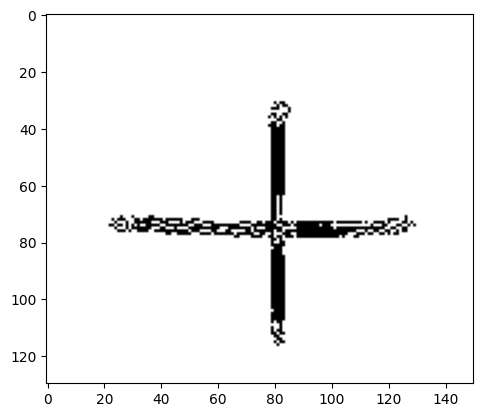


testing data index: 2  predict:  4  actual:  0
[7.0949725e-04 2.3368963e-03 3.8309305e-04 2.9043562e-05 9.9437743e-01
 8.6183691e-06 8.4378640e-04 6.3052645e-04 7.9753154e-05 5.7499378e-04
 2.6373191e-05]


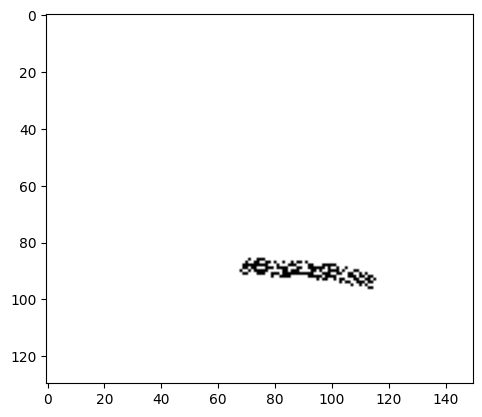

In [16]:
count = 0
for i in range(len(predictions)):
    if count < 3: # sample only some of them
        actual = np.argmax(y_test[i])
        pred = np.argmax(predictions[i])

        if actual != pred:
            print("\ntesting data index:",i," predict: ",pred," actual: ",actual)
            print(predictions[i])
            picture = X_test[i]
            plt.gray()
            plt.imshow(picture)
            plt.show()
            count = count + 1

In [17]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 1s 72ms/step


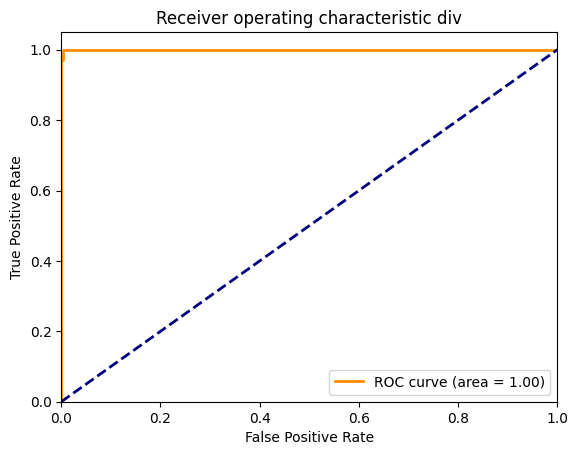

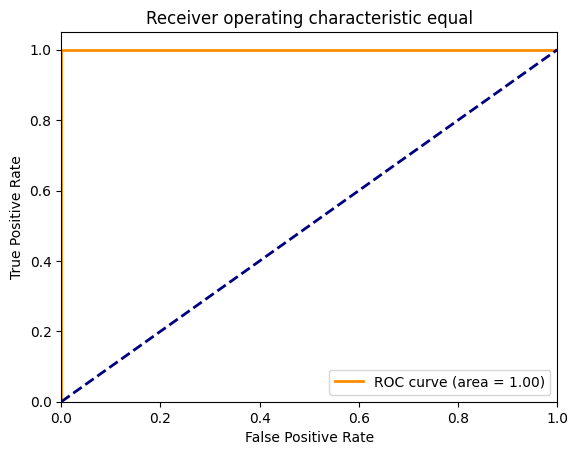

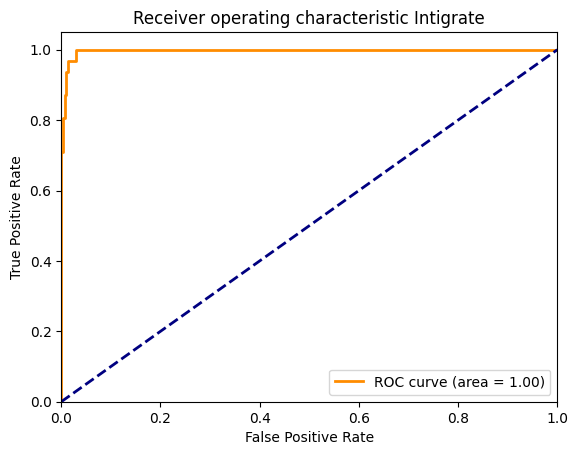

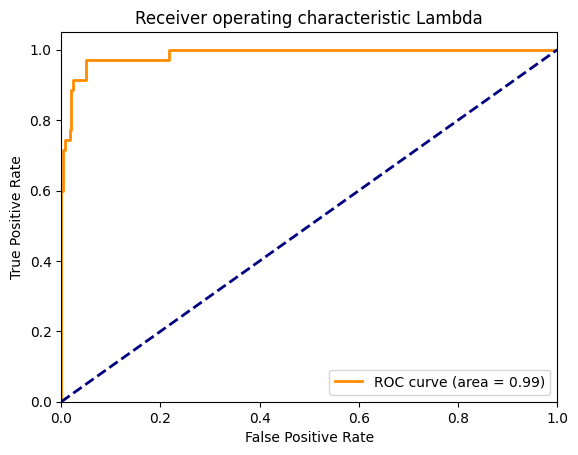

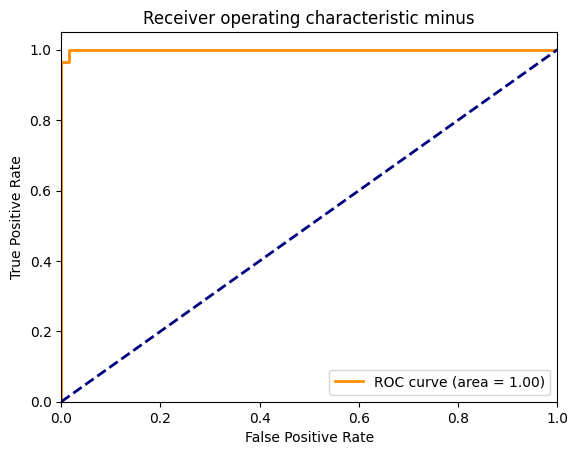

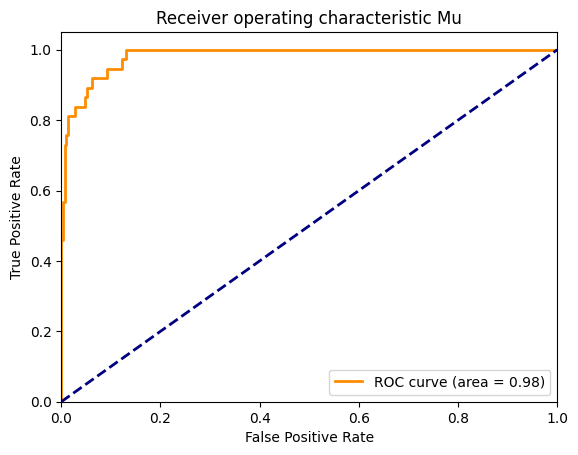

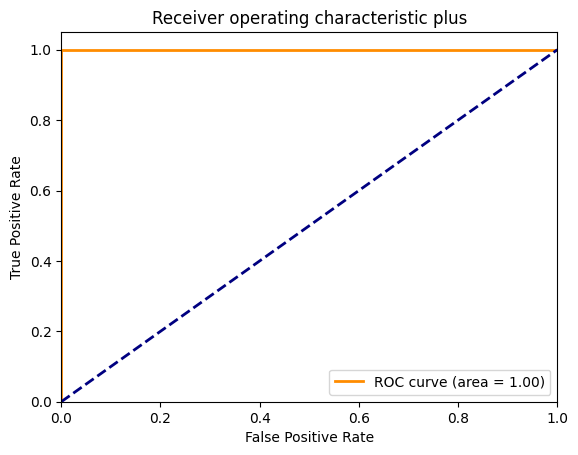

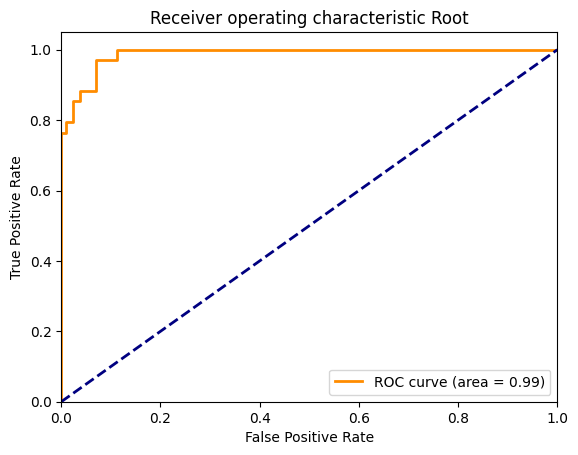

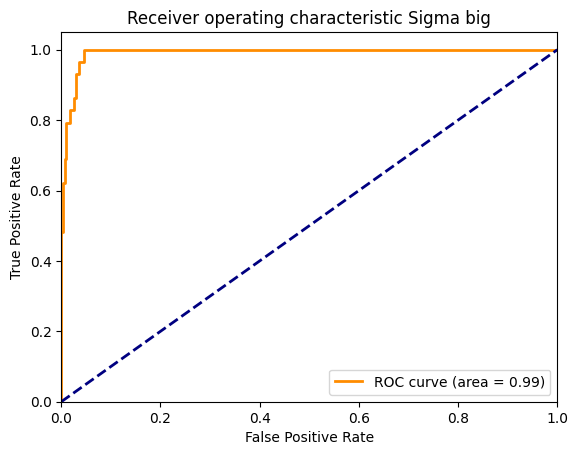

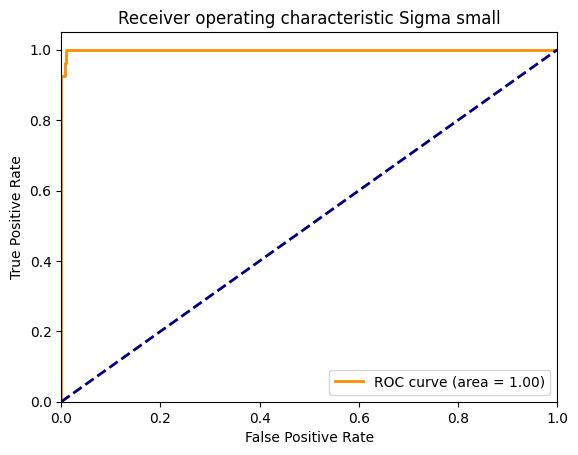

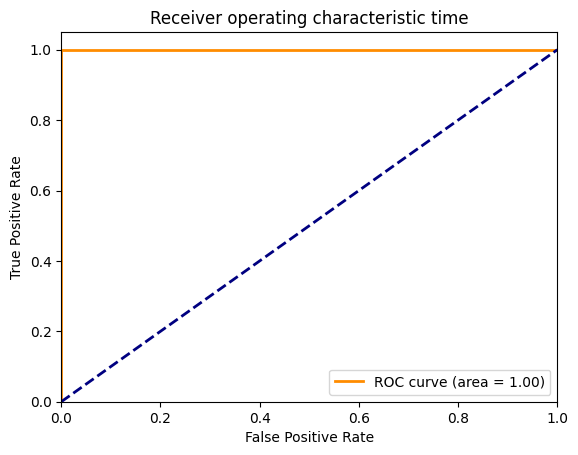

In [18]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Number of classes
n_classes = Y_test.shape[1]

# Binarize the labels
y_test_binarized = label_binarize(Y_test, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
  plt.figure()
  lw = 2
  plt.plot(fpr[i], tpr[i], color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver operating characteristic {class_names[i]}')
  plt.legend(loc="lower right")
  plt.show()
